### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [2]:
anime_df = pd.read_csv('anime.csv')
rating_df = pd.read_csv('rating.csv')

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins:Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_df.shape

(12294, 7)

In [5]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


#### Observation :
In rating column the value -1 is suspicious because the rating system goes from 1 to 10. It is either a non-rated anime or 1 rated anime. Anyway, we can't say for sure. So either convert these -1's to 1 or just drop all the -1 values.

In [6]:
rating_df.shape

(7813737, 3)

In [7]:
# Dropping the -1 values from rating_df
rating_df = rating_df[rating_df['rating']!=-1] 

### Exploratory Data Analysis

<AxesSubplot:>

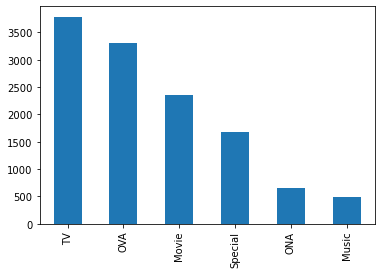

In [8]:
anime_df['type'].value_counts().plot(kind='bar')

In [9]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
rating_df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [11]:
# merging the two dataframes on the basis of user id

df = pd.merge(anime_df,rating_df,on='anime_id')
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10


In [12]:
df.shape

(6337239, 9)

In [13]:
# renaming some features name so we don't get confused

df.rename(columns = {'rating_x':'avg_rating', 'rating_y':'user_rating'}, inplace = True)

In [14]:
df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10


Checking top animes based on their ratings and number of ratings given to them.

In [15]:
# Checking top 10 animes based on their rating

pd.DataFrame(anime_df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10))

,rating
name,
Taka no Tsume 8: Yoshida-kun no X-Files,10.00
Spoon-hime no Swing Kitchen,9.60
Mogura no Motoro,9.50
Kimi no Na wa.,9.37
Kahei no Umi,9.33
Fullmetal Alchemist: Brotherhood,9.26
Yakusoku: Africa Mizu to Midori,9.25
Steins:Gate,9.17
Gintama,9.15


In [16]:
# Checking top 10 animes based on their avg rating after merging the dataframes

pd.DataFrame(df.groupby('name')['avg_rating'].mean().sort_values(ascending=False).head(10))

,avg_rating
name,
Kimi no Na wa.,9.370000
Fullmetal Alchemist: Brotherhood,9.260000
Steins:Gate,9.170000
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,9.150000
Hunter x Hunter (2011),9.130000
Gintama,9.112754
Gintama: Enchousen,9.110000
Ginga Eiyuu Densetsu,9.110000
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,9.100000


In [17]:
# Checking top 10 animes based on avg user ratings after merging dataframes

ratings_mean = pd.DataFrame(df.groupby('name')['user_rating'].mean().sort_values(ascending=False))
ratings_mean.head(10)

,user_rating
name,
Kero Kero Keroppi no Kero Kero House no Himitsu,10.0
Shakotan★Boogie,10.0
Whats Michael? (TV),10.0
Sekai Meisaku Douwa: Wow! Maerchen Oukoku,10.0
Kawasaki Frontale x Tentai Senshi Sunred 2nd Season,10.0
Ajisai no Uta,10.0
Mak Dau Goo Si,10.0
Mak Dau Xiang Dang Dang,10.0
"McDull, the Alumni",10.0


Based on the avg user ratings these animes have rated very few times beacuse it is highly unusual to get full star rated.
So, let's check it again based on number of ratings.

In [18]:
ratings_mean['num of ratings'] = pd.DataFrame(df.groupby('name')['user_rating'].count())
ratings_mean.head()

,user_rating,num of ratings
name,,
Kero Kero Keroppi no Kero Kero House no Himitsu,10.0,1
Shakotan★Boogie,10.0,1
Whats Michael? (TV),10.0,1
Sekai Meisaku Douwa: Wow! Maerchen Oukoku,10.0,2
Kawasaki Frontale x Tentai Senshi Sunred 2nd Season,10.0,1


As we can see that there are very few ratings to this animes. Now let's check based on decreasing number of ratings.

In [19]:
ratings_mean.sort_values('num of ratings',ascending=False).head(10)

,user_rating,num of ratings
name,,
Death Note,8.834629,34226
Sword Art Online,8.140213,26310
Shingeki no Kyojin,8.725741,25290
Code Geass: Hangyaku no Lelouch,8.927796,24126
Angel Beats!,8.549714,23565
Elfen Lied,8.064434,23528
Naruto,7.893888,22071
Fullmetal Alchemist: Brotherhood,9.322741,21494
Fullmetal Alchemist,8.453356,21332


#### Now let us see the distribution with visualization

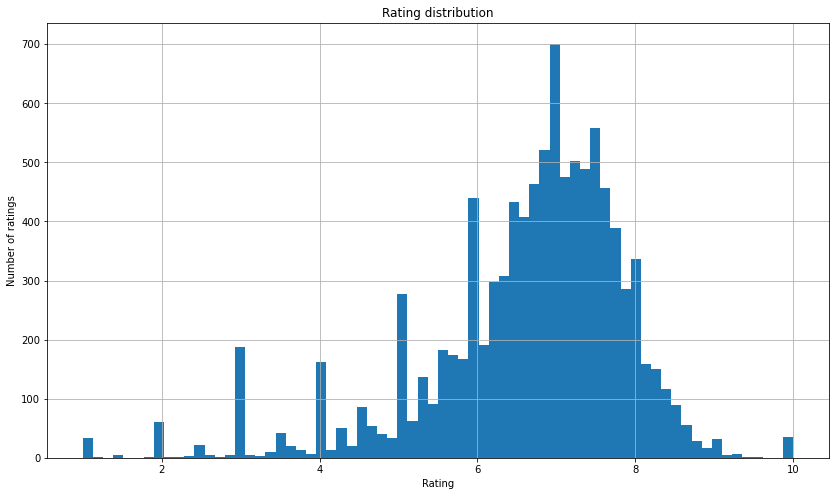

In [20]:
plt.figure(figsize=(14,8))
ratings_mean['user_rating'].hist(bins=70)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.title('Rating distribution')
plt.show()

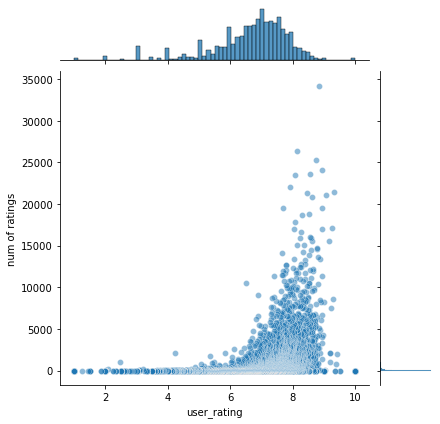

In [21]:
sns.jointplot(x='user_rating', y='num of ratings', data=ratings_mean, alpha=0.5)

### Recommendation system

In [22]:
### first let us filter our database as it is a very big database which cannot be run on average pc's

counts1 = df['user_id'].value_counts()

### filtering user_id based on number of animes they rated to
df = df[df['user_id'].isin(counts1[counts1 >= 500].index)]
df.shape

(1005314, 9)

In [23]:
### creating pivot table to correlate animes and users based on user ratings
animes = df.pivot_table(columns = 'name', index = 'user_id', values = 'user_rating')
animes.head()


name,0,009 Re:Cyborg,009-1,009-1: RB,00:08,07-Ghost,1,1+2=Paradise,100-man-nen Chikyuu no Tabi: Bander Book,1000-nen Joou: Queen Millennia,...,s Pure,s Pure Bonus,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
226,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,8.0,7.0,NaN,8.0,NaN
392,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN


#### Defining a function to recommend animes based on user ratings, number of ratings and pearson correlation.

In [24]:
def find_corr(animes, name):

    similar_to_anime = animes.corrwith(animes[name])
    similar_to_anime = pd.DataFrame(similar_to_anime,columns=['Correlation'])
    similar_to_anime.dropna(inplace=True)
    similar_to_anime = similar_to_anime.join(ratings_mean['num of ratings'])
    similar_to_anime = pd.DataFrame(similar_to_anime[similar_to_anime['num of ratings']>500].
                                    sort_values(by = 'Correlation', ascending = False).head(10)) 
    return similar_to_anime

Let us find some recommendation

In [25]:
find_corr(animes, 'Naruto')

C:\Users\masra\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\masra\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
name,,
Naruto,1.000000,22071
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono,0.650401,3627
Mitsu x Mitsu Drops,0.649497,691
Naruto: Takigakure no Shitou - Ore ga Eiyuu Dattebayo!,0.638975,2719
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!,0.638650,884
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,0.635762,5897
Naruto: Shippuuden Movie 2 - Kizuna,0.635734,4460
Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!,0.631980,4633
Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo!,0.631716,4315


In [26]:
find_corr(animes, 'Death Note')

C:\Users\masra\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\masra\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
name,,
Death Note,1.000000,34226
Death Note Rewrite,0.550776,3006
Steins:Gate: Kyoukaimenjou no Missing Link - Divide By Zero,0.444868,623
Yume-iro Pâtissière SP Professional,0.441724,671
Noblesse: Awakening,0.434128,604
Fushigi Yuugi OVA,0.428727,671
Shingeki no Kyojin,0.426618,25290
Berserk: Ougon Jidai-hen III - Kourin,0.417760,2104
Kyoukai no Kanata Movie: ll Be Here - Mirai-hen,0.413431,1199
